In [17]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("data.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [21]:
categorical_features = ['Renovation', 'Apartment type', 'Metro station', 'Region']
numerical_features = ['Minutes to metro', 'Number of rooms', 'Area',
                      'Living area', 'Kitchen area', 'Floor', 'Number of floors']
target = 'Price'

In [22]:
for col in categorical_features:
    df[col] = df[col].astype("category")

In [23]:
X = df[categorical_features + numerical_features]
y = df[target]

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    early_stopping_rounds=100,
    verbose=100
)

In [26]:
model.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    cat_features=categorical_features
)

0:	learn: 77995310.6898802	test: 76497679.9911278	best: 76497679.9911278 (0)	total: 30.5ms	remaining: 30.5s
100:	learn: 31405265.6482417	test: 41260360.9907477	best: 41253843.3877507 (99)	total: 2.76s	remaining: 24.6s
200:	learn: 26418585.3644880	test: 38980056.0996331	best: 38980056.0996331 (200)	total: 5.52s	remaining: 22s
300:	learn: 23463747.3289057	test: 38405796.7697999	best: 38405796.7697999 (300)	total: 8.3s	remaining: 19.3s
400:	learn: 21406087.1343117	test: 37932011.4604094	best: 37922030.5290979 (396)	total: 11s	remaining: 16.4s
500:	learn: 19817266.6121814	test: 37646361.2908057	best: 37617881.1151842 (494)	total: 13.5s	remaining: 13.5s
600:	learn: 18621968.4019236	test: 37426587.9380248	best: 37403210.7317371 (597)	total: 16.2s	remaining: 10.8s
700:	learn: 17524869.4351713	test: 37178862.8264831	best: 37173594.6025071 (694)	total: 19.2s	remaining: 8.18s
800:	learn: 16369560.4980660	test: 37080802.4105683	best: 37070877.8906947 (795)	total: 22s	remaining: 5.47s
900:	learn: 

In [27]:
y_pred = model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:,.2f} руб.")
print(f"MAE: {mae:,.2f} руб.")
print(f"R²: {r2:.3f}")

RMSE: 36,727,000.05 руб.
MAE: 9,529,918.13 руб.
R²: 0.796


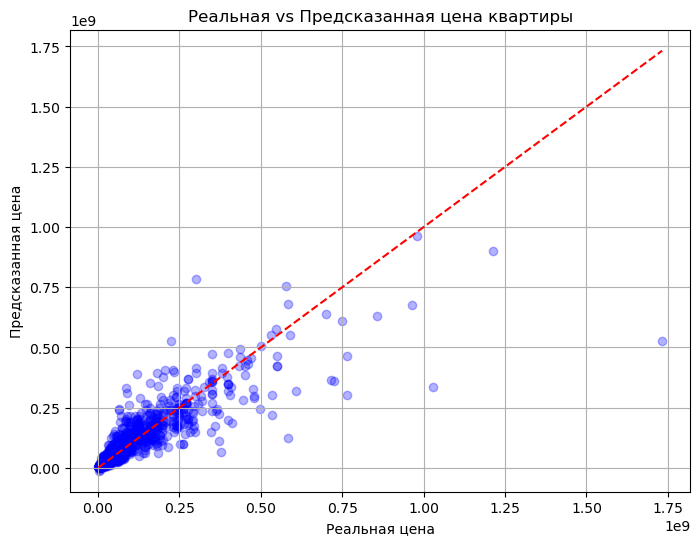

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, alpha=0.3, color='blue')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.title('Реальная vs Предсказанная цена квартиры')
plt.grid(True)
plt.show()

In [29]:
model.save_model("catboost_model.cbm")

In [30]:
model = CatBoostRegressor()
model.load_model("catboost_model.cbm")

In [31]:
import pandas as pd

new_flat = {
    'Renovation': 'Cosmetic',
    'Apartment type': 'New building',
    'Metro station': 'Домодедовская',
    'Region': 'Moscow region',
    'Minutes to metro': 25.0,
    'Number of rooms': 1.0,
    'Area': 31.60,
    'Living area': 10.1,
    'Kitchen area': 12.2,
    'Floor': 5.0,
    'Number of floors': 12
}

X_new = pd.DataFrame([new_flat])

In [32]:
predicted_price = model.predict(X_new)
print(f"🏠 Ожидаемая цена квартиры: {predicted_price[0]:,.0f} руб.")

🏠 Ожидаемая цена квартиры: 6,549,371 руб.
